In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/DS_Hiring(car_price_prediction)/Participant_Data_TheMathCompany_.DSHH.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


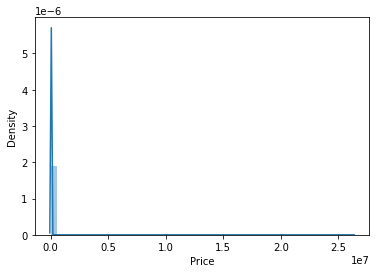

In [ ]:
sns.distplot(train['Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


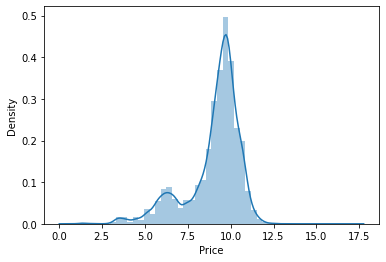

In [ ]:
sns.distplot(np.log1p(train['Price']))
plt.show()

In [ ]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [ ]:
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
train['Levy']=train['Levy'].replace('-',np.nan)

In [ ]:
test['Levy']=test['Levy'].replace('-',np.nan)

In [ ]:
train['Levy']=train['Levy'].astype(float)
test['Levy']=test['Levy'].astype(float)

In [ ]:
train['Prod. year']=train['Prod. year'].astype(str)
test['Prod. year']=test['Prod. year'].astype(str)

In [ ]:
train['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [ ]:
train['Drive wheels']=train['Drive wheels'].replace('4x4','4-WD')
test['Drive wheels']=test['Drive wheels'].replace('4x4','4-WD')

In [ ]:
train['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [ ]:
train['Mileage']=train['Mileage'].str.replace('km','')
test['Mileage']=test['Mileage'].str.replace('km','')

In [ ]:
train['Mileage']=train['Mileage'].astype(float)
test['Mileage']=test['Mileage'].astype(float)

In [ ]:
train['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
train['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [ ]:
# train['Doors']=train['Doors'].str.replace({'04-May':'04','02-Mar':'02'})
# test['Doors']=test['Doors'].str.replace({'04-May':'04','02-Mar':'02'})
train['Doors']=train['Doors'].str.replace('04-May','04')
train['Doors']=train['Doors'].str.replace('02-Mar','02')
test['Doors']=test['Doors'].str.replace('04-May','04')
test['Doors']=test['Doors'].str.replace('02-Mar','02')

In [ ]:
train['Doors'].value_counts()

04    18332
02      777
>5      128
Name: Doors, dtype: int64

In [ ]:
train['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [ ]:
train['Efficiency_based']=train['Engine volume'].replace(['2.0 Turbo', '2.2 Turbo','3.0 Turbo','1.4 Turbo','1.5 Turbo', '1.6 Turbo',
                                                              '2.3 Turbo','2.8 Turbo','1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '3.2 Turbo',
                                                              '1.3 Turbo','2.5 Turbo','1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.2 Turbo',
                                                              '4.8 Turbo', '4.6 Turbo','1.2 Turbo','1.7 Turbo', '6.3 Turbo', '2.7 Turbo',
                                                              '2.9 Turbo', '4.0 Turbo','3.6 Turbo','3.7 Turbo','5.5 Turbo','2.1 Turbo',
                                                              '0.7 Turbo', '0.6 Turbo','1.0 Turbo', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo',
                                                              '3.1', '5.0 Turbo','5.7 Turbo','0.4 Turbo', '5.4 Turbo', '0.3 Turbo',
                                                              '1.1 Turbo'],'Turbo')

test['Efficiency_based']=test['Engine volume'].replace(['2.0 Turbo', '2.2 Turbo','3.0 Turbo','1.4 Turbo','1.5 Turbo', '1.6 Turbo',
                                                              '2.3 Turbo','2.8 Turbo','1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '3.2 Turbo',
                                                              '1.3 Turbo','2.5 Turbo','1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.2 Turbo',
                                                              '4.8 Turbo', '4.6 Turbo','1.2 Turbo','1.7 Turbo', '6.3 Turbo', '2.7 Turbo',
                                                              '2.9 Turbo', '4.0 Turbo','3.6 Turbo','3.7 Turbo','5.5 Turbo','2.1 Turbo',
                                                              '0.7 Turbo', '0.6 Turbo','1.0 Turbo', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo',
                                                              '3.1', '5.0 Turbo','5.7 Turbo','0.4 Turbo', '5.4 Turbo', '0.3 Turbo',
                                                              '1.1 Turbo'],'Turbo')

In [ ]:
train['Efficiency_based']=train['Efficiency_based'].replace(['3.5','3','1.3','2.5','2','1.8','2.4','4','1.6','3.3','4.7','1.5',
                                                                 '4.4','3.6','2.3','2.2','1.4','5.5','3.2','3.8','4.6','1.2','5', 
                                                                 '1.7', '2.9', '0.5','1.9','2.7','4.8','5.3','0.4','2.8','1.1','2.1',
                                                                 '0.7','5.4','3.7','1','2.6','5.7','3.4','4.3','4.2','5.9','6.8','4.5',
                                                                 '0.6','7.3','0.1','6.3','6.4','5.2','5.8','0.8', '6.7', '6.2', '0', 
                                                                 '20', '0.3', '0.2','5.6', '6', '3.9', '0.9'],'Non-Turbo')

test['Efficiency_based']=test['Efficiency_based'].replace(['3.5','3','1.3','2.5','2','1.8','2.4','4','1.6','3.3','4.7','1.5',
                                                                 '4.4','3.6','2.3','2.2','1.4','5.5','3.2','3.8','4.6','1.2','5', 
                                                                 '1.7', '2.9', '0.5','1.9','2.7','4.8','5.3','0.4','2.8','1.1','2.1',
                                                                 '0.7','5.4','3.7','1','2.6','5.7','3.4','4.3','4.2','5.9','6.8','4.5',
                                                                 '0.6','7.3','0.1','6.3','6.4','5.2','5.8','0.8', '6.7', '6.2', '0', 
                                                                 '20', '0.3', '0.2','5.6', '6', '3.9', '0.9'],'Non-Turbo')



In [ ]:
train['Efficiency_based'].value_counts()

Non-Turbo    17305
Turbo         1932
Name: Efficiency_based, dtype: int64

In [ ]:
train['Engine volume']=train['Engine volume'].str.replace('Turbo',' ')
test['Engine volume']=test['Engine volume'].str.replace('Turbo',' ')

In [ ]:
train['Engine volume']=train['Engine volume'].astype(float)
test['Engine volume']=test['Engine volume'].astype(float)

In [ ]:
train['Cylinders']=train['Cylinders'].astype(str)
test['Cylinders']=test['Cylinders'].astype(str)

In [ ]:
train.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Efficiency_based       0
dtype: int64

In [ ]:
test.isnull().sum()

ID                     0
Levy                2454
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Price               8245
Efficiency_based       0
dtype: int64

Filling Null Value By their Mean

In [ ]:
train['Levy']=train['Levy'].fillna(train['Levy'].mean())
test['Levy']=test['Levy'].fillna(test['Levy'].mean())

In [ ]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Efficiency_based
0,45654403,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4-WD,04,Left wheel,Silver,12,Non-Turbo
1,44731507,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4-WD,04,Left wheel,Black,8,Non-Turbo
2,45774419,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2,Non-Turbo
3,45769185,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4-WD,04,Left wheel,White,0,Non-Turbo
4,45809263,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4,Non-Turbo


In [ ]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Efficiency_based
0,44020629,917.859955,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0.0,4,Manual,Front,02,Left wheel,Grey,10,NaN,Turbo
1,45784798,917.859955,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000.0,4,Tiptronic,Front,04,Left wheel,Grey,10,NaN,Non-Turbo
2,45800257,917.859955,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000.0,4,Automatic,Front,04,Right-hand drive,Sky blue,8,NaN,Non-Turbo
3,45797981,975.000000,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000.0,6,Automatic,4-WD,04,Left wheel,Blue,12,NaN,Non-Turbo
4,45814303,917.859955,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000.0,4,Manual,Front,04,Left wheel,Black,0,NaN,Non-Turbo


TRAIN

In [ ]:
cat=[]
num=[]
for i in train.columns:
    if train[i].dtype==object:
        cat.append(i)
    else:
        num.append(i)

print('The Numerical features are {}'.format(num))
print('The Categorical features are {}'.format(cat))

The Numerical features are ['ID', 'Price', 'Levy', 'Engine volume', 'Mileage', 'Airbags']
The Categorical features are ['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Efficiency_based']


In [ ]:
df_features=train.drop(columns=['Price','ID','Manufacturer','Model'])

In [ ]:
df_target=train['Price']

In [ ]:
num_data=df_features[['ID','Levy','Engine volume','Mileage','Airbags']]

In [ ]:
cat_data=df_features[['Manufacturer', 'Model','Prod. year', 'Category', 'Leather interior', 'Fuel type', 
                      'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Efficiency_based']]

In [ ]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [ ]:
sc=StandardScaler()
oe=OrdinalEncoder()
num_dataframe=pd.DataFrame(sc.fit_transform(num_data),columns=num_data.columns)
cat_dataframe=pd.DataFrame(oe.fit_transform(cat_data),columns=cat_data.columns)
concat_dataframe=pd.concat([num_dataframe,cat_dataframe],axis=1)

In [ ]:
concat_dataframe.head()

In [ ]:
test.drop('Price',axis=1,inplace=True)

In [ ]:
cat=[]
num=[]
for i in test.columns:
    if test[i].dtype==object:
        cat.append(i)
    else:
        num.append(i)

print('The Numerical features are {}'.format(num))
print('The Categorical features are {}'.format(cat))

The Numerical features are ['ID', 'Levy', 'Engine volume', 'Mileage', 'Airbags']
The Categorical features are ['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Efficiency_based']


In [ ]:
df_test=test

In [ ]:
num_data_test=df_test[['ID','Levy','Engine volume','Mileage','Airbags']]

In [ ]:
cat_data_test=df_test[['Manufacturer', 'Model','Prod. year', 'Category', 'Leather interior', 'Fuel type', 
                      'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Efficiency_based']]

In [ ]:
sc=StandardScaler()
oe=OrdinalEncoder()
num_dataframe_t=pd.DataFrame(sc.fit_transform(num_data_test),columns=num_data_test.columns)
cat_dataframe_t=pd.DataFrame(oe.fit_transform(cat_data_test),columns=cat_data_test.columns)
concat_dataframe_t=pd.concat([num_dataframe_t,cat_dataframe_t],axis=1)
concat_dataframe_without_standard_scaling=pd.concat([num_data_test,cat_dataframe_t],axis=1)

In [ ]:
concat_dataframe_t.head()

In [ ]:
x=concat_dataframe.copy()

In [ ]:
y=df_target.copy()

In [ ]:
x.head()

In [ ]:
y=np.log1p(y)

In [ ]:
x.drop('ID',axis=1,inplace=True)

In [ ]:
# x.drop('Prod. year',axis=1,inplace=True)

In [ ]:
x.head()

In [ ]:

x.shape

In [ ]:
y

0         9.497697
1         9.718482
2         9.044050
3         8.190909
4         9.369649
           ...    
19232     9.044050
19233     9.660269
19234    10.170035
19235     8.581482
19236     6.154858
Name: Price, Length: 19237, dtype: float64

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=33)

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 52kB/s 


In [ ]:
import sklearn.model_selection as skms 
from catboost import CatBoostRegressor

In [ ]:
param_test2 = {
    'learning_rate' : np.arange(0.01,0.05,0.123),
    'iterations' : np.arange(1000,1200,1500),
    'depth' : np.arange(3,6,8)
}

cb_CV = skms.GridSearchCV(estimator = CatBoostRegressor(), 
                  param_grid=param_test2, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, verbose=1)

cb_CV.fit(x, y)
print(cb_CV.best_params_,cb_CV.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.8s finished


0:	learn: 1.5821994	total: 3.19ms	remaining: 3.19s
1:	learn: 1.5783354	total: 7.49ms	remaining: 3.74s
2:	learn: 1.5744535	total: 10.8ms	remaining: 3.59s
3:	learn: 1.5708077	total: 14ms	remaining: 3.49s
4:	learn: 1.5671310	total: 17.1ms	remaining: 3.41s
5:	learn: 1.5635174	total: 20.5ms	remaining: 3.39s
6:	learn: 1.5600204	total: 23.6ms	remaining: 3.34s
7:	learn: 1.5565626	total: 26.6ms	remaining: 3.3s
8:	learn: 1.5531325	total: 29.7ms	remaining: 3.27s
9:	learn: 1.5496851	total: 32.7ms	remaining: 3.24s
10:	learn: 1.5462936	total: 35.7ms	remaining: 3.21s
11:	learn: 1.5430741	total: 38.7ms	remaining: 3.19s
12:	learn: 1.5399121	total: 41.7ms	remaining: 3.17s
13:	learn: 1.5368105	total: 44.6ms	remaining: 3.14s
14:	learn: 1.5337860	total: 47.6ms	remaining: 3.12s
15:	learn: 1.5306731	total: 50.6ms	remaining: 3.11s
16:	learn: 1.5277171	total: 53.5ms	remaining: 3.1s
17:	learn: 1.5248328	total: 56.5ms	remaining: 3.08s
18:	learn: 1.5219346	total: 59.6ms	remaining: 3.08s
19:	learn: 1.5190243	total

In [ ]:
from catboost import CatBoostRegressor
CB = CatBoostRegressor(iterations=1293, depth=7, learning_rate=0.01)

CB.fit(x,y)#,eval_set=(X_test, y_test)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1.5804582	total: 6.58ms	remaining: 8.5s
1:	learn: 1.5749992	total: 13.1ms	remaining: 8.48s
2:	learn: 1.5695558	total: 19.4ms	remaining: 8.34s
3:	learn: 1.5641922	total: 25.6ms	remaining: 8.25s
4:	learn: 1.5587594	total: 32ms	remaining: 8.24s
5:	learn: 1.5534310	total: 37.9ms	remaining: 8.13s
6:	learn: 1.5483390	total: 44.1ms	remaining: 8.1s
7:	learn: 1.5432174	total: 50.4ms	remaining: 8.09s
8:	learn: 1.5382689	total: 56.4ms	remaining: 8.05s
9:	learn: 1.5333034	total: 62.6ms	remaining: 8.03s
10:	learn: 1.5284802	total: 68.8ms	remaining: 8.02s
11:	learn: 1.5239214	total: 74.8ms	remaining: 7.99s
12:	learn: 1.5193162	total: 80.8ms	remaining: 7.95s
13:	learn: 1.5148231	total: 87.1ms	remaining: 7.96s
14:	learn: 1.5104145	total: 93.4ms	remaining: 7.96s
15:	learn: 1.5058865	total: 99.8ms	remaining: 7.97s
16:	learn: 1.5014422	total: 106ms	remaining: 7.96s
17:	learn: 1.4970156	total: 112ms	remaining: 7.96s
18:	learn: 1.4927716	total: 119ms	remaining: 7.95s
19:	learn: 1.4886199	total: 1

Trying for stacking model..

In [ ]:
# Stacking regressor function to ensemble LGBM and CatBoost
def get_stacking():
    level0 = [#('lgbm_regressor', lgb.LGBMRegressor(n_estimators=3000, max_depth=11, learning_rate=0.06, num_leaves=40)),
              #('gradient_regressor',GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03)),
               #('XGB_regressor', xgb.XGBRegressor(n_estimators=700, objective='reg:squarederror', max_depth=7, learning_rate=0.06, colsample_bytree=0.9, subsample=0.8))]
               ('catboost', CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=2000, depth=6))]
    
    level1 = ExtraTreesRegressor()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
parameters={'lambda_l1': 3.143999426146237e-07, 'lambda_l2': 0.012047390488690692, 'num_leaves': 448, 'learning_rate': 0.002522800539517572, 'n_estimators': 2931, 'feature_fraction': 0.9829128082633156, 'bagging_fraction': 0.7950217986778924, 'bagging_freq': 2, 'min_child_samples': 21}

In [ ]:
params={'lambda_l1': 2.9080060070166736e-05, 'lambda_l2': 1.634310604301865, 'num_leaves': 511, 'learning_rate': 0.006333044343116939, 'n_estimators': 1278, 'feature_fraction': 0.9424649875716494, 'bagging_fraction': 0.7449206788880791, 'bagging_freq': 2, 'min_child_samples': 5}

In [ ]:
# K-Fold Cross Validation 
kf = KFold(n_splits=10, shuffle=True)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(x, y), 1):
    X_train = x.iloc[train_index]
    #X_train = ordinal_enc(X_train, cat_feature)
    #for col in cat_feature:
      #X_train[col] = le.fit_transform(X_train[col])
    
   # y_train = np.log(y.iloc[train_index])
    y_train = y.iloc[train_index]

    
    X_test = x.iloc[test_index]
    #X_test = label_enc(X_test, cat_feature, testing=True)
    #for col in cat_feature:
      #X_test[col] = le.fit_transform(X_test[col])

    y_test = y.iloc[test_index]
    
    #model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.03)
    #model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    #model = ElasticNet()
    model = lgb.LGBMRegressor(**params)#n_estimators=2700, max_depth=11, learning_rate=0.05, num_leaves=40
    #model = lgb.LGBMRegressor(lambda_l1=3.143999426146237e-07, lambda_l2=0.012047390488690692, num_leaves= 448, learning_rate= 0.002522800539517572, n_estimators= 2931, feature_fraction= 0.9829128082633156, bagging_fraction= 0.7950217986778924, bagging_freq=2, min_child_samples=21)
    #model = xgb.XGBRegressor(n_estimators=590, objective='reg:squarederror', max_depth=7, learning_rate=0.06, min_child_weight=1.2)
    #model = get_stacking()
    #model = ExtraTreesRegressor(n_estimators=500, bootstrap=True, n_jobs=-1)
    #model = LinearRegression()
    #model = KNeighborsRegressor(weights='distance', n_neighbors=15)
    #model = CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=1700, depth=6)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
 
    score = np.sqrt(mean_squared_error(y_test, np.expm1(pred)))#
    print(f'RMSLE score for fold {fold} is {score}')
    scores.append(score)

print(f'Mean RMSLE score is {np.mean(scores)}')

RMSLE score for fold 1 is 20748.20876542025
RMSLE score for fold 2 is 20479.486206083686
RMSLE score for fold 3 is 22573.918139144233
RMSLE score for fold 4 is 21299.26729920181
RMSLE score for fold 5 is 20108.790741277862
RMSLE score for fold 6 is 20782.098134179218
RMSLE score for fold 7 is 19578.60622532827
RMSLE score for fold 8 is 20089.59704839827
RMSLE score for fold 9 is 20282.435755002585
RMSLE score for fold 10 is 21373.086700529264
Mean RMSLE score is 20731.549501456546


In [ ]:
model = get_stacking()

In [ ]:
model.fit(x, y)

StackingRegressor(cv=5,
                  estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x7fa9d8973250>)],
                  final_estimator=ExtraTreesRegressor(bootstrap=False,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                            

In [ ]:
concat_dataframe_t.head()

In [ ]:
concat_dataframe_without_standard_scaling.head()

In [ ]:
concat_dataframe_t.drop('ID',axis=1,inplace=True)

In [ ]:
concat_dataframe_t.drop('Prod. year',axis=1,inplace=True)

In [ ]:
concat_dataframe_t.head()

In [ ]:
concat_dataframe_t.shape

In [ ]:
pred = model.predict(concat_dataframe_t)
pred=np.expm1(pred)
# from sklearn.metrics import r2_score
# print(r2_score(y_test, pred))

In [ ]:
output=pd.DataFrame()
output["Price"]=pd.Series(pred)
output.to_csv("submission_p5.csv",index=False)

In [ ]:
s=pd.read_csv('/content/submission_p5.csv')
s.head()

,Price
0,8832.304856
1,11155.918357
2,2846.265726
3,7886.335437
4,2729.233982


Hyper-parameter Tunning using Optuna

In [ ]:
!pip install optuna

     |████████████████████████████████| 307kB 13.9MB/s 
     |████████████████████████████████| 174kB 71.3MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 112kB 34.2MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 143kB 72.4MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11136 sha256=12ae5f52915fd5ac19efc8e0374508a14c4fa01c3a1372d458c1d5244048ec1e
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
import lightgbm as lgbm
import optuna
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10) # for reproducibility
def objective(trial):
    
    # dtrain = lgb.Dataset(X_train, label=y_train)
    
    param = {
        'objective': 'regression',
        'metric': 'mean_absolute_error',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        # 'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 2000),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        #'learning_rate': 0.01,
        'n_estimators': trial.suggest_int('n_estimators', 700, 3000),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    lgbm_regr = lgbm.LGBMRegressor(**param)
    lgbm_2 = lgbm_regr.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    return mean_absolute_error(np.expm1(y_test), np.expm1(lgbm_2.predict(X_test)))

study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2021-07-17 09:34:05,166] A new study created in memory with name: no-name-0e0d570b-ba2d-444f-b53e-0c7b9d91bbab
[I 2021-07-17 09:34:18,536] Trial 0 finished with value: 13361.850043998857 and parameters: {'lambda_l1': 0.08747537025773001, 'lambda_l2': 1.537331564587801e-08, 'num_leaves': 325, 'learning_rate': 0.00978207662259244, 'n_estimators': 1847, 'feature_fraction': 0.5348779873185086, 'bagging_fraction': 0.5188377188557745, 'bagging_freq': 6, 'min_child_samples': 21}. Best is trial 0 with value: 13361.850043998857.
[I 2021-07-17 09:34:34,423] Trial 1 finished with value: 19361.927803616465 and parameters: {'lambda_l1': 6.238186113062485e-08, 'lambda_l2': 0.014731208123898084, 'num_leaves': 489, 'learning_rate': 1.075439863800637e-08, 'n_estimators': 1878, 'feature_fraction': 0.8875725769912681, 'bagging_fraction': 0.7675156400976328, 'bagging_freq': 6, 'min_child_samples': 33}. Best is trial 0 with value: 13361.850043998857.
[I 2021-07-17 09:34:41,009] Trial 2 finished with val

In [ ]:
study.best_params

{'bagging_fraction': 0.5481206874123156,
 'bagging_freq': 2,
 'feature_fraction': 0.7389966530833013,
 'lambda_l1': 5.483024688407131e-05,
 'lambda_l2': 3.550880445243686e-05,
 'learning_rate': 0.0019398966202741161,
 'min_child_samples': 13,
 'n_estimators': 2996,
 'num_leaves': 469}

In [ ]:
study.best_value

12898.906862170597

In [ ]:
study.best_trial

FrozenTrial(number=70, values=[12898.906862170597], datetime_start=datetime.datetime(2021, 7, 17, 9, 54, 33, 812984), datetime_complete=datetime.datetime(2021, 7, 17, 9, 55, 11, 189499), params={'lambda_l1': 5.483024688407131e-05, 'lambda_l2': 3.550880445243686e-05, 'num_leaves': 469, 'learning_rate': 0.0019398966202741161, 'n_estimators': 2996, 'feature_fraction': 0.7389966530833013, 'bagging_fraction': 0.5481206874123156, 'bagging_freq': 2, 'min_child_samples': 13}, distributions={'lambda_l1': LogUniformDistribution(high=10.0, low=1e-08), 'lambda_l2': LogUniformDistribution(high=10.0, low=1e-08), 'num_leaves': IntUniformDistribution(high=512, low=2, step=1), 'learning_rate': LogUniformDistribution(high=1.0, low=1e-08), 'n_estimators': IntUniformDistribution(high=3000, low=700, step=1), 'feature_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_freq': IntUniformDistribution(high=7, low=1, step=1), 'min_child_samples